# Facebook Visualization

In [25]:
import zipfile
import os

# 定义zip文件路径和解压目标路径
zip_file_path = "facebook.zip"  # 替换为你的zip文件路径
extract_path = "E:/rumors-in-multi-agent/plotting_scripts"   # 替换为解压目标路径

# 创建解压目录（如果不存在）
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# 解压文件
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print(f"文件已解压到：{extract_path}")

文件已解压到：E:/rumors-in-multi-agent/plotting_scripts


Number of nodes: 333
Number of edges: 2519


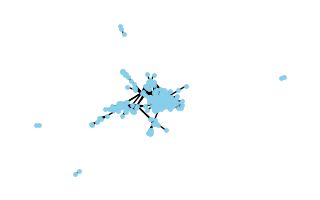

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def read_facebook_network(id):
  dir = 'facebook'
  edges_path = f'{dir}/{id}.edges'
  with open(edges_path, 'r') as file:
      edges = [tuple(map(int, line.strip().split())) for line in file]

  # Create a Graph using NetworkX
  G = nx.Graph()
  G.add_edges_from(edges)

  # Check the number of nodes and edges
  print("Number of nodes:", G.number_of_nodes())
  print("Number of edges:", G.number_of_edges())

  # Load node features
  feat_path = f'{dir}/{id}.feat'
  features = pd.read_csv(feat_path, sep=' ', header=None)
  features.columns = ['node'] + [f'feat_{i}' for i in range(1, features.shape[1])]
  # print(features.head())

  # Load ego features (assuming these are features for the ego node itself)
  egofeat_path = f'{dir}/{id}.egofeat'
  egofeatures = pd.read_csv(egofeat_path, sep=' ', header=None)
  # print(egofeatures.head())

  # Plot the graph
  plt.figure(figsize=(3, 1.8))
  pos = nx.spring_layout(G, seed=42)
  nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_color='skyblue', node_size=6, edge_color='k', font_weight='bold')
  #plt.title('Facebook Social Network', fontsize=18)
  plt.savefig("Facebook_Social_Graph.png")
  plt.show()

  return G

G_fb = read_facebook_network(0)

# Random Graph Visualization

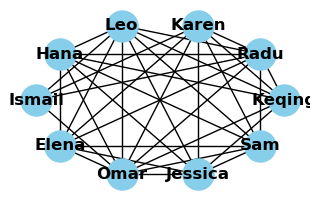

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph from the .graphml file
G = nx.read_graphml('Social_Graph.graphml')

# # Change node labels by relabeling the nodes in the graph
# new_labels = {0:'Keqing', 1:'Radu', 2:'Karen', 3:'Leo', 4:'Hana', 5:'Ismail', 6:'Elena', 7:'Omar', 8:'Jessica', 9:'Sam'}
# G = nx.relabel_nodes(G, new_labels)

# Draw the graph
plt.figure(figsize=(3, 1.8))
pos = nx.circular_layout(G) #nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_color='skyblue', node_size=500, edge_color='k', font_weight='bold')

# Display the plot
#plt.title('Social Network', fontsize=18)
plt.savefig("Social_Graph.png")
plt.show()


# Spread of Rumors Visualization

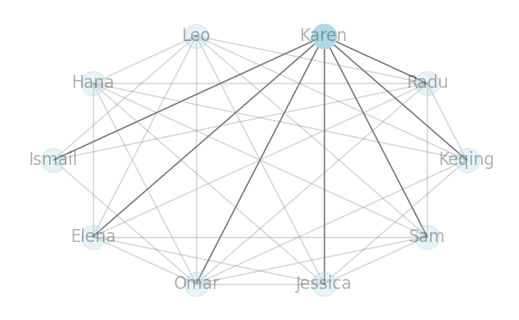

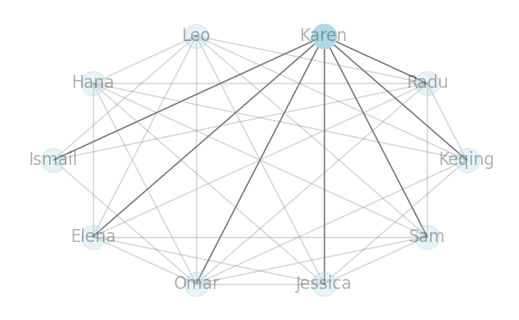

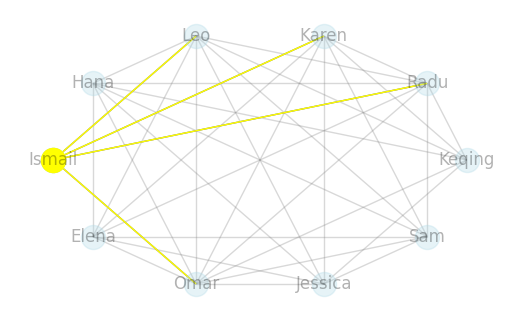

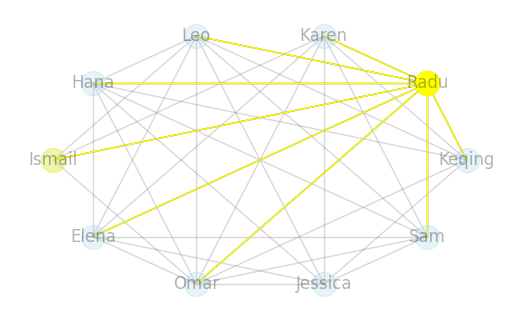

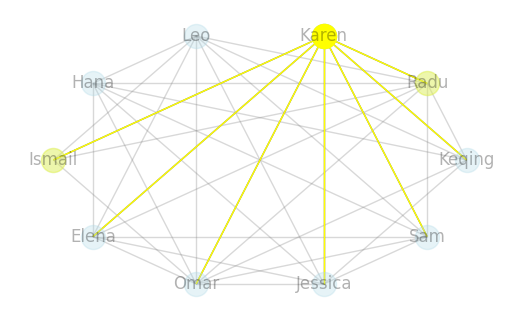

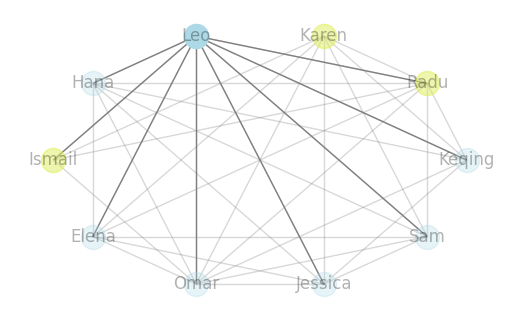

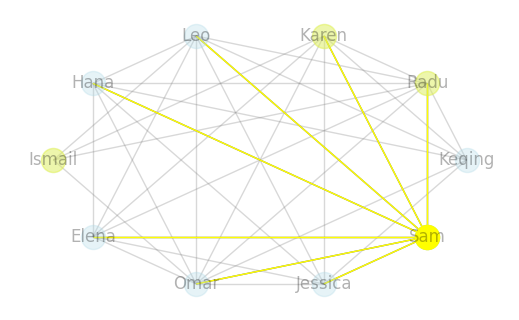

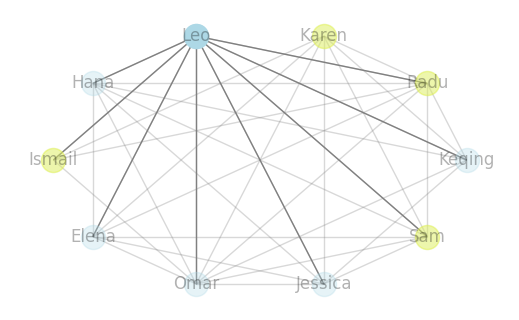

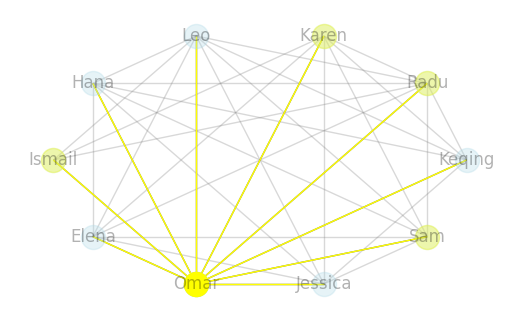

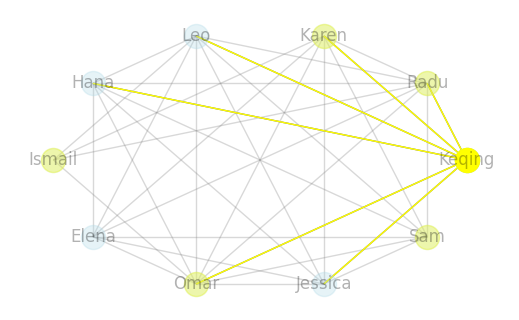

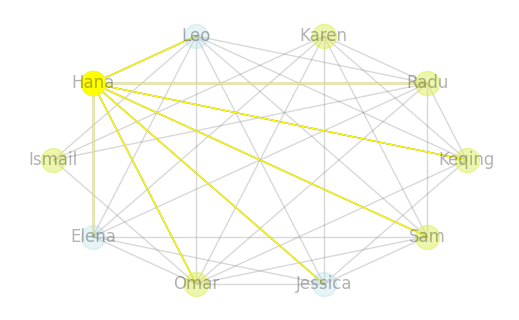

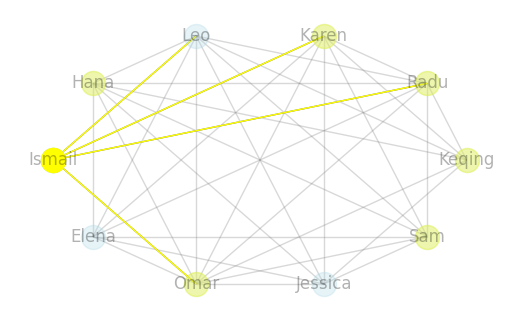

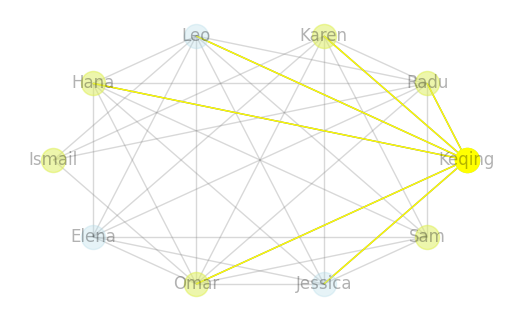

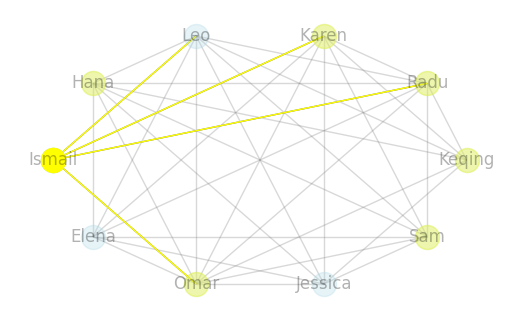

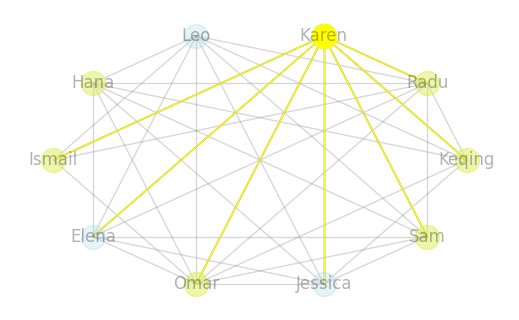

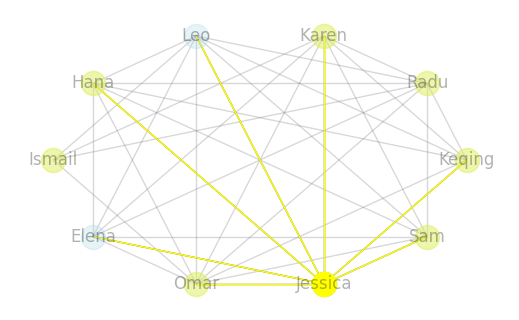

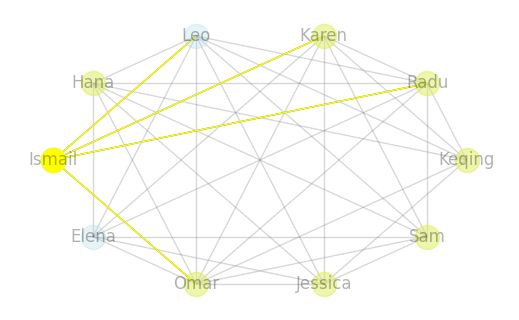

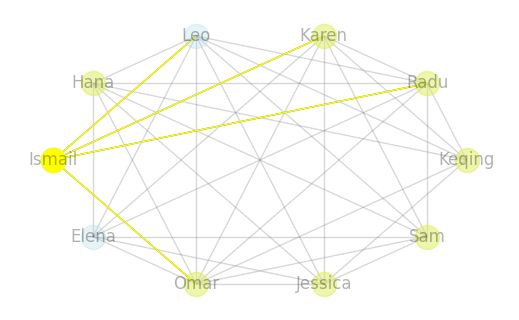

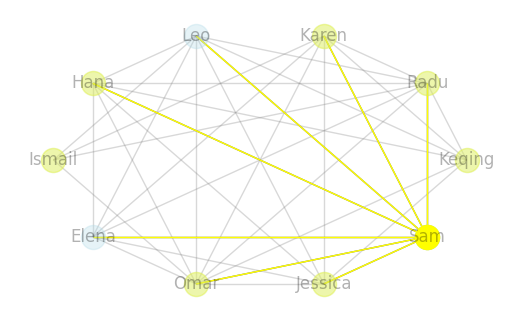

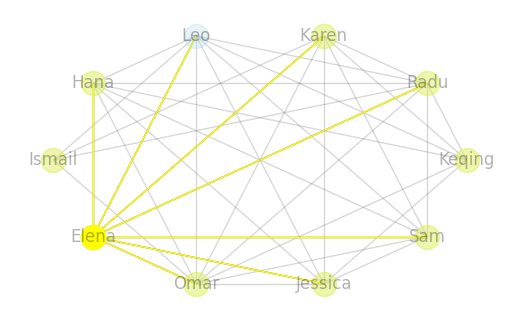

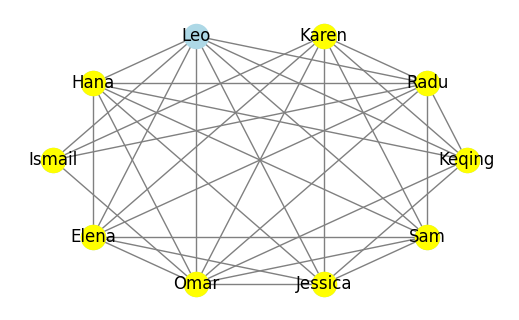

In [ ]:
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
def read_matrices_from_file(file_path):
  matrices = []  # List to store all matrices

  with open(file_path, 'r') as file:
    content = file.read().strip()  # Read the entire file and remove any trailing newlines or spaces

    # Split the content into blocks based on the double newline separating matrices
    matrix_blocks = content.split('\n\n\n')

    for block in matrix_blocks:
      # Split each block into lines, and then split each line into numbers (integers 0 or 1)
      matrix = []
      for line in block.splitlines():
        # Convert each line to a list of integers
        row = list(map(int, line.split()))  # Parsing 0s and 1s as integers
        matrix.append(row)

      # Convert to a NumPy array (optional, depending on how you want to use the matrices)
      matrix_array = np.array(matrix)
      matrices.append(matrix_array)

  return matrices

# Example usage
file_path = 'rumor_matrix_demo.txt'  # Replace with the path to your text file
matrices = read_matrices_from_file(file_path)

# # Printing the matrices for demonstration
# for idx, matrix in enumerate(matrices):
#     print(f"Matrix {idx + 1}:\n{matrix}\n")

# Specify Actor per Iteration:
actors = ['2', '2', '5', '1', '2', '3', '9', '3', '7', '0', '4', '5', '0', '5', '2', '8', '5', '5', '9', '6', '6', '5', '4', '2', '5']

# Specify the directory path to save pngs
directory = "./rumor_spread_visualization"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Load the graph from the .graphml file
file_path = 'Social_Graph.graphml'  # Update with the path to your .graphml file
G = nx.read_graphml(file_path)

# Fixing the position of nodes to maintain consistent layout
pos = nx.circular_layout(G)

for idx in range(len(matrices)):

  # Draw the graph
  plt.figure(figsize=(5, 3))

  # Plot all nodes and edges with default colors
  nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_color='lightblue', edge_color='gray', alpha=0.3)

  # Define nodes and edges with full opaque (current actors and neighbors)
  opaque_edges = [(actors[idx], x) for x in list(G.neighbors(actors[idx]))]  # Update with your edge pairs

  # Opaque specified nodes and edges
  nx.draw_networkx_nodes(G, pos, nodelist=actors[idx], node_color='lightblue')
  nx.draw_networkx_edges(G, pos, edgelist=opaque_edges, edge_color='gray')

  # Define nodes and edges to highlight (rumor-spreading)
  highlight_nodes = [str(x) for x in np.where(matrices[idx][:,0]==1)[0]]  # Update with your node identifiers
  # Highlight affected nodes and edges appropriately
  nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_color='yellow', alpha=0.3)
  if actors[idx] in highlight_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=actors[idx], node_color='yellow')
    nx.draw_networkx_edges(G, pos, edgelist=opaque_edges, edge_color='yellow')

  # plt.title(f'Iteration {idx+1}', fontsize=18)
  plt.savefig(f'{directory}/Iteration_{idx}.png')
  plt.show()

# Final Snapshot
plt.figure(figsize=(5, 3))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_color='lightblue', edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_color='yellow')
# plt.title(f'Final Snapshot', fontsize=18)
plt.savefig(f'{directory}/Iteration_{idx+1}.png')
plt.show()

In [ ]:
import cv2
import os

def create_video_with_last_frame_delay(image_folder, video_name, frame_rate=30, delay_frames=30):
    # Get the list of images in the folder
    images = [img for img in os.listdir(image_folder) if img.endswith(".png") or img.endswith(".jpg")]

    # Sort the images by their file name (to ensure correct order)
    images = sorted(images, key=lambda x: int(x.split('_')[1].split('.')[0]))
    print(images)

    # Read the first image to get the frame size
    first_image_path = os.path.join(image_folder, images[0])
    frame = cv2.imread(first_image_path)
    height, width, layers = frame.shape

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec
    video = cv2.VideoWriter(video_name, fourcc, frame_rate, (width, height))

    # Loop through all the images and write them to the video
    for image in images:
        image_path = os.path.join(image_folder, image)
        frame = cv2.imread(image_path)
        video.write(frame)  # Add each frame to the video

    # Add the last frame multiple times to create a delay effect
    last_frame_path = os.path.join(image_folder, images[-1])
    last_frame = cv2.imread(last_frame_path)

    for _ in range(delay_frames):  # Repeat the last frame `delay_frames` times
        video.write(last_frame)

    # Release the VideoWriter object
    video.release()

# Example usage
image_folder = "./rumor_spread_visualization"  # The folder where the images are stored
video_name = 'output_video_with_delay.mp4'  # The name of the output video file
frame_rate = 2  # Frames per second
delay_frames = 4  # Number of times to repeat the last frame (this will control how long the delay is)

create_video_with_last_frame_delay(image_folder, video_name, frame_rate, delay_frames)


['Iteration_0.png', 'Iteration_1.png', 'Iteration_2.png', 'Iteration_3.png', 'Iteration_4.png', 'Iteration_5.png', 'Iteration_6.png', 'Iteration_7.png', 'Iteration_8.png', 'Iteration_9.png', 'Iteration_10.png', 'Iteration_11.png', 'Iteration_12.png', 'Iteration_13.png', 'Iteration_14.png', 'Iteration_15.png', 'Iteration_16.png', 'Iteration_17.png', 'Iteration_18.png', 'Iteration_19.png', 'Iteration_20.png']


In [ ]:
from PIL import Image
import os

def create_gif_with_last_frame_delay(image_folder, gif_name, frame_duration=50, delay_frames=30):
    # Get the list of images in the folder
    images = [img for img in os.listdir(image_folder) if img.endswith(".png") or img.endswith(".jpg")]

    # Sort the images by their file name (to ensure correct order)
    images = sorted(images, key=lambda x: int(x.split('_')[1].split('.')[0]))
    print(images)

    # Load images
    frames = [Image.open(os.path.join(image_folder, image)) for image in images]

    # Extend the last frame for the delay
    for _ in range(delay_frames):
        frames.append(frames[-1])

    # Save the frames as a GIF
    frames[0].save(
        gif_name,
        format="GIF",
        append_images=frames[1:],
        save_all=True,
        duration=frame_duration,
        loop=0
    )

# Example usage
image_folder = "./rumor_spread_visualization"  # The folder where the images are stored
gif_name = 'output_with_delay.gif'  # The name of the output GIF file
frame_duration = 500  # Duration of each frame in milliseconds
delay_frames = 4  # Number of times to repeat the last frame for delay effect

create_gif_with_last_frame_delay(image_folder, gif_name, frame_duration, delay_frames)


['Iteration_0.png', 'Iteration_1.png', 'Iteration_2.png', 'Iteration_3.png', 'Iteration_4.png', 'Iteration_5.png', 'Iteration_6.png', 'Iteration_7.png', 'Iteration_8.png', 'Iteration_9.png', 'Iteration_10.png', 'Iteration_11.png', 'Iteration_12.png', 'Iteration_13.png', 'Iteration_14.png', 'Iteration_15.png', 'Iteration_16.png', 'Iteration_17.png', 'Iteration_18.png', 'Iteration_19.png', 'Iteration_20.png']
